In [5]:
import torch
import numpy as np
from datasets import *
from models import MUnet
import torch.nn.functional as F
from utils import onehot2mask
import matplotlib.pyplot as plt
model = MUnet(1,4)
# load state dict
model.load_state_dict(torch.load('output/seg/stage-1/6/best_dice.pth'))
model.eval()
k=2

In [6]:
import SimpleITK as sitk
index = 6
labelroot = 'datasets/test/C0LET2_gt_for_challenge19/LGE_manual_35_TestData/patient'+str(index) +'_LGE_manual.nii.gz'
imageroot = 'datasets/train/all_image/patient' + str(index) +'_LGE.nii.gz'
image = sitk.ReadImage(imageroot)
image = sitk.GetArrayFromImage(image)
label = sitk.ReadImage(labelroot)
label = sitk.GetArrayFromImage(label)

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "datasets/test/C0LET2_gt_for_challenge19/LGE_manual_35_TestData/patient6_LGE_manual.nii.gz" does not exist.

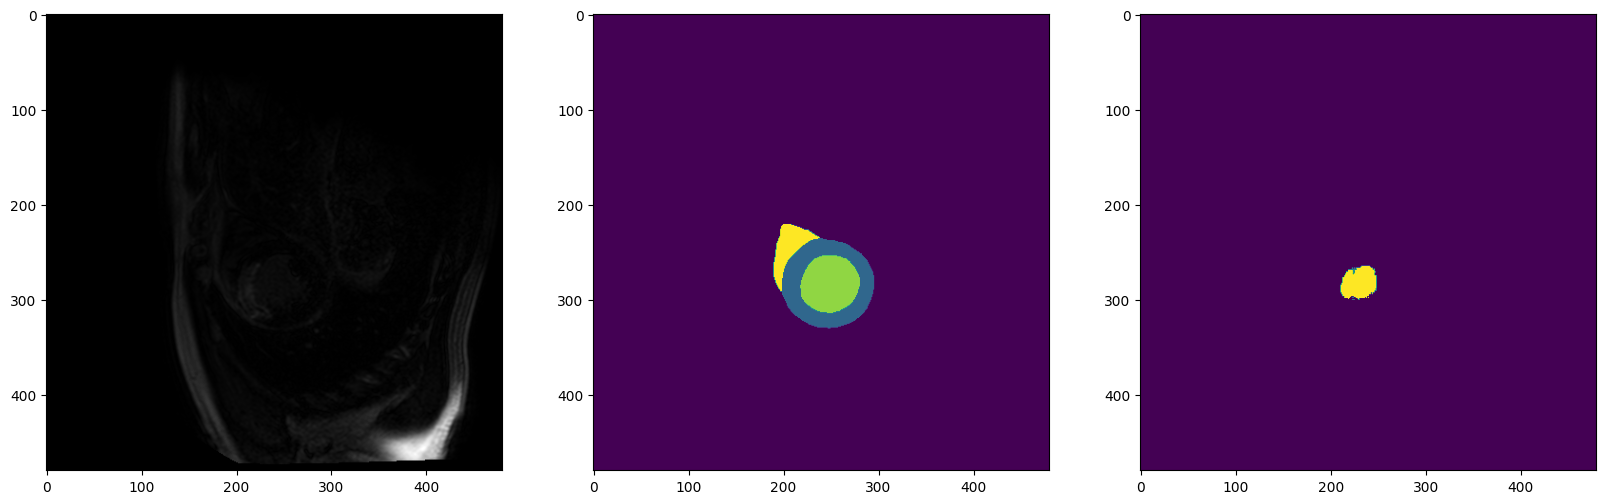

In [12]:
import matplotlib.pyplot as plt
slice = 6
input_ = image[slice,:,:]
input = torch.tensor(input_).unsqueeze(dim=0)
input = minmax_normal(input).unsqueeze(dim=0)
target = label[slice,:,:]
predict = model(input)
output = F.softmax(predict.detach(),dim=1).squeeze(dim=0)
remark = [[0.0],[200.0],[500.0],[600.0]]
label_ = onehot2mask(output,remark)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(input_,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(target)
plt.subplot(1,3,3)
plt.imshow(label_)